Aufgaben Linear Networks
========================



## Imports



the common imports:



In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np

## Linear Regression Network



In the following exercise you should create a linear regression
model from scratch and test it on some synthetically created data:



In [157]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    # Rauschen dazu addieren, Form von y
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

n_samples=100
X, y = synthetic_data(true_w, true_b, n_samples)
K = 2
print(X.shape, y.shape)

torch.Size([100, 2]) torch.Size([100, 1])


Our goal is to fit a simple regression model with Batch Gradient Descent.
We start with randomly chosen values for the weights and zero bias.
First, implement the function below.



In [158]:
torch.manual_seed(0)
w = torch.normal(0, 0.01, size=(K, 1))
b = torch.zeros(1)
print(X.shape)
print(w.shape)
print(b.shape)

def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

torch.Size([100, 2])
torch.Size([2, 1])
torch.Size([1])


Now we need to define the loss functions to be used:



In [159]:
def squared_loss(y_hat, y):
    assert y_hat.shape == y.shape
    return 0.5*((y_hat -y)**2).sum()

Now we need to implement the training loop for Gradient Descent.
You should not use `autograd` for computing the gradient, instead
build on the closed formula presented in the lecture.



True weights: tensor([ 2.0000, -3.4000])
Epoch(0):
  - Gradients: tensor([-2.8184,  3.3779])
  - New Weights: tensor([[ 0.2973],
        [-0.3407]])
  - New Bias: tensor([0.3503])
Epoch(10):
  - Gradients: tensor([-0.6558,  1.1300])
  - New Weights: tensor([[ 1.6873],
        [-2.2630]])
  - New Bias: tensor([2.6115])
Epoch(20):
  - Gradients: tensor([-0.1247,  0.4224])
  - New Weights: tensor([[ 1.9899],
        [-2.9416]])
  - New Bias: tensor([3.5520])
Epoch(30):
  - Gradients: tensor([-0.0070,  0.1709])
  - New Weights: tensor([[ 2.0348],
        [-3.2058]])
  - New Bias: tensor([3.9353])
Epoch(40):
  - Gradients: tensor([0.0113, 0.0725])
  - New Weights: tensor([[ 2.0283],
        [-3.3154]])
  - New Bias: tensor([4.0907])
Epoch(50):
  - Gradients: tensor([0.0095, 0.0315])
  - New Weights: tensor([[ 2.0175],
        [-3.3625]])
  - New Bias: tensor([4.1541])
Epoch(60):
  - Gradients: tensor([0.0056, 0.0139])
  - New Weights: tensor([[ 2.0102],
        [-3.3831]])
  - New Bias: ten

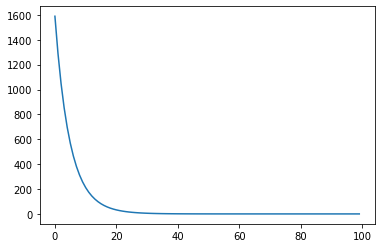

In [160]:
step = 0.1
n_epoch = 100

loss_arr = np.zeros(n_epoch) # to record current loss
print(f"True weights: {true_w}")

for epoch in range(n_epoch):
    # 1.  Compute the prediction y_hat
    y_hat = linreg(X, w, b)
    # remember the loss for plotting it later
    loss_arr[epoch] = squared_loss(y_hat, y)
    # 2. Use y_hat and y to compute the gradients
    gradient_vals = torch.zeros(len(X), len(w))
    bias_grad_vals = torch.zeros(len(X), 1)
    #bias ergänzen!!!!!!!!!!!!
    for i in range(0, len(X)):
        gradient_vals[i] = (y_hat[i] - y[i]) * X[i]
        bias_grad_vals[i] = (y_hat[i] - y[i])
    gradients = torch.mean(gradient_vals, 0)
    bias_gradients = torch.mean(bias_grad_vals, 0)
    # 3. Update the parameters
    w = w - step * gradients.reshape(-1, 1)
    b = b - step * bias_gradients
    if epoch % 10 == 0:
        print(f"Epoch({epoch}):")
        print(f"  - Gradients: {gradients}")
        print(f"  - New Weights: {w}")
        print(f"  - New Bias: {b}")
print(f"Final weights: {w}")
print(f"Final bias: {b}")
plt.plot(loss_arr)

## Linear networks with autograd



The goal now is to use `autograd` the compute the gradient.
You can use the same skeleton as before



Epoch(0):
  - New Weights: tensor([[ 0.2973],
        [-0.3407]], requires_grad=True)
  - New Bias: tensor([0.3503], requires_grad=True)
Epoch(10):
  - New Weights: tensor([[ 1.6873],
        [-2.2630]], requires_grad=True)
  - New Bias: tensor([2.6115], requires_grad=True)
Epoch(20):
  - New Weights: tensor([[ 1.9899],
        [-2.9416]], requires_grad=True)
  - New Bias: tensor([3.5520], requires_grad=True)
Epoch(30):
  - New Weights: tensor([[ 2.0348],
        [-3.2058]], requires_grad=True)
  - New Bias: tensor([3.9353], requires_grad=True)
Epoch(40):
  - New Weights: tensor([[ 2.0283],
        [-3.3154]], requires_grad=True)
  - New Bias: tensor([4.0907], requires_grad=True)
Epoch(50):
  - New Weights: tensor([[ 2.0175],
        [-3.3625]], requires_grad=True)
  - New Bias: tensor([4.1541], requires_grad=True)
Epoch(60):
  - New Weights: tensor([[ 2.0102],
        [-3.3831]], requires_grad=True)
  - New Bias: tensor([4.1801], requires_grad=True)
Epoch(70):
  - New Weights: tensor(

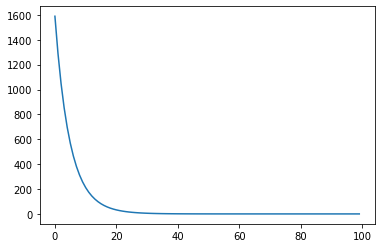

In [161]:
torch.manual_seed(0)
w = torch.normal(0, 0.01, size=(K,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

step = 0.1
n_epoch = 100

loss_arr = torch.zeros(n_epoch) # to record current loss

for epoch in range(n_epoch):
    # 1.  Compute the prediction y_hat
    y_hat = linreg(X, w, b)
    # remember the loss for plotting it later
    loss = squared_loss(y_hat, y)
    loss_arr[epoch] = loss.detach()
    # 2. Use the computed loss to compute the gradients
    loss.backward()
    with torch.no_grad():
        w -= step*w.grad/n_samples
        b -= step*b.grad/n_samples
        w.grad.zero_()
        b.grad.zero_()
    
    if epoch % 10 == 0:
        print(f"Epoch({epoch}):")
        print(f"  - New Weights: {w}")
        print(f"  - New Bias: {b}")
print(f"Final weights: {w}")
print(f"Final bias: {b}")

plt.plot(loss_arr)

## Linear classification



We  want to implement a linear network for classification.
We use the famous IRIS data set as an example.



In [162]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y)

This time the network is implemented as a class,
the only thing missing is the implementation of the softmax function,
for example
$$
softmax(y)_1 = \frac{e^{y_1}}{ \sum_{i=1}^p  e^{y_i} }.
$$
You have to implement it below.



In [214]:
def softmax(y):
    y_exp_one_hot = torch.exp(y)
    y_exp = torch.zeros(len(y))
    partition = y_exp_one_hot.sum(axis=1, keepdims=True)
    y_exp_one_hot = y_exp_one_hot / partition
    print(y_exp_one_hot.shape)
    for i, row in enumerate(y):
        max_val = row[0]
        for j, col in enumerate(row):
            if col > max_val:
                max_val = j
        y_exp[i] = max_val
    print(y_exp)
    return torch.tensor(y_exp, dtype=int)

print(softmax(torch.normal(0, 0.01, size=(3, 1), dtype=torch.float64)))

class SoftmaxNetwork:

    def __init__(self, num_input, num_output, dtype=torch.float64):
        """
        Args:
            num_input: dimension of input space
            num_output: number if output classes
        """
        self.w = torch.randn((num_input,num_output),
                             dtype=dtype).requires_grad_(True)
        self.b = torch.randn(num_output, dtype=dtype).requires_grad_(True)

    def forward(self, X):
        """
        Args:
            X: tensor of shape (n, d)
        """
        y = (X @ self.w + self.b)
        return softmax(y)

torch.Size([3, 1])
tensor([-0.0141, -0.0156, -0.0042])
tensor([0, 0, 0])


C:\Users\steffen.lang\AppData\Local\Temp\ipykernel_18656\1668991339.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(y_exp, dtype=int)


Next we have to implement the cross entropy loss, it is already finished:



In [215]:
def cross_entropy(y_hat, y):
    return (-torch.log(y_hat[range(len(y_hat)), y])).mean()

Note that this implementation does not require a one-hot-encoding for $y$
(but there is one side effect: $y$ has to be of type `torch.int64`!).

The final step is to implement a function that runs the training for us:



In [216]:
def run_training(net, X, y, f_loss, n_epochs, lr=0.1):
    train_loss = np.zeros(n_epochs)
    
    for epoch in range(0, n_epochs):
        y_hat = net.forward(X)
        print(type(y_hat), y_hat.shape)
        print(type(y), y.shape)
        loss = f_loss(y_hat, y)
        loss.backward()
        with torch.no_grad():
            net.w -= lr*net.w.grad
            net.b -= lr*net.b.grad
            net.w.grad.zero_()
            net.b.grad.zero_()
        train_loss[epoch] = loss
    return loss

Now train the model, don't forget to cast X and y to Pytorch tensors.



In [217]:
net = SoftmaxNetwork(4,3, dtype=torch.float32)
train_loss = run_training(net, X, y,  cross_entropy, n_epochs=100, lr=0.2)

plt.plot(train_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Learning curve');

torch.Size([150, 3])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.])
<class 'torch.Tensor'> torch.Size([150])
<class 'torch.Tensor'> torch.Size([150])


C:\Users\steffen.lang\AppData\Local\Temp\ipykernel_18656\1668991339.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(y_exp, dtype=int)


IndexError: too many indices for tensor of dimension 1

1.  Run the training several times, and observe the different learning curves.
2.  Try the same with a lower learning rate, say $lr=0.05$. Do you see any differences?

Finally check the accuracy of the model, that is the fraction of correctly predicted examples.
Of course this is on training only. If you like you can try to split the
data into train and test and evaluate your network on the test data set.
A useful function for this is `train_test_split` found in `sklearn.model_selection`.

